<a href="https://colab.research.google.com/github/sarthakc123/1GorillaVs100Men/blob/main/1_Gorilla_vs_100_Men.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo Simulation to check if 1 Gorilla can win against 100 Men

Grid: 44x44 | Max Steps: 5000
Gorilla - HP: 538, Damage: 40, Speed: 10
Men - HP: 18, Speed: 1
Step 0 | Gorilla HP: 538 | Alive Men: 100
🦍 Gorilla hit man at (21, 20) → HP left: -22
💀 Man at (21, 20) died.
👊 Man at (21, 20) hit gorilla for 7 → Gorilla HP: 531
Step 1 | Gorilla HP: 531 | Alive Men: 99
Step 2 | Gorilla HP: 531 | Alive Men: 99
Step 3 | Gorilla HP: 531 | Alive Men: 99
Step 4 | Gorilla HP: 531 | Alive Men: 99
Step 5 | Gorilla HP: 531 | Alive Men: 99
👊 Man at (24, 28) hit gorilla for 7 → Gorilla HP: 524
Step 6 | Gorilla HP: 524 | Alive Men: 99
Step 7 | Gorilla HP: 524 | Alive Men: 99
Step 8 | Gorilla HP: 524 | Alive Men: 99
Step 9 | Gorilla HP: 524 | Alive Men: 99
Step 10 | Gorilla HP: 524 | Alive Men: 99
👊 Man at (34, 28) hit gorilla for 7 → Gorilla HP: 517
👊 Man at (34, 26) hit gorilla for 6 → Gorilla HP: 511
Step 11 | Gorilla HP: 511 | Alive Men: 99
🦍 Gorilla hit man at (34, 36) → HP left: -22
💀 Man at (34, 36) died.
👊 Man at (34, 36) hit gorilla for 10 → Gorilla HP: 501
St

<ipython-input-1-c82cd4ec5347>:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  HTML(ani.to_jshtml())


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


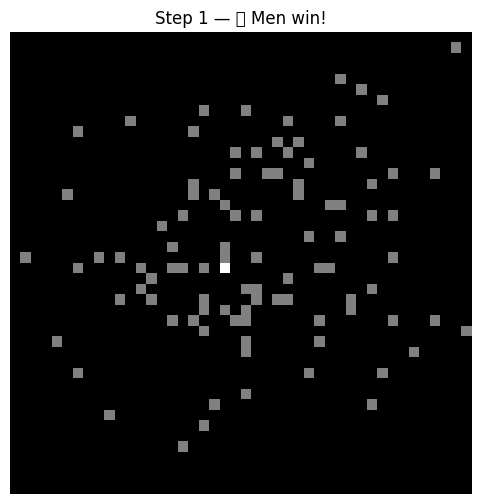

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Simulation Parameters ---
GRID_SIZE = random.randint(20,50)
NUM_MEN = 100
MAX_STEPS = 5000

MAN_HP = random.randint(10, 20)
GORILLA_HP = random.randint(400, 600)
GORILLA_DAMAGE = 40
GORILLA_SPEED = 10
GORILLA_ACCURACY = 0.9

MAN_DAMAGE_RANGE = (5, 10)
MAN_SPEED = 1
MAN_ACCURACY = 0.6

print(f"Grid: {GRID_SIZE}x{GRID_SIZE} | Max Steps: {MAX_STEPS}")
print(f"Gorilla - HP: {GORILLA_HP}, Damage: {GORILLA_DAMAGE}, Speed: {GORILLA_SPEED}")
print(f"Men - HP: {MAN_HP}, Speed: {MAN_SPEED}")

# --- Movement Helper ---
def move_position(src, target, speed):
    sx, sy = src
    tx, ty = target
    distance = abs(tx - sx) + abs(ty - sy)

    # Only move up to the remaining distance
    steps = min(speed, distance)

    for _ in range(steps):
        dx = 1 if tx > sx else -1 if tx < sx else 0
        dy = 1 if ty > sy else -1 if ty < sy else 0

        if dx != 0:
            sx += dx
        elif dy != 0:
            sy += dy

        # Clamp to grid bounds
        sx = min(max(0, sx), GRID_SIZE - 1)
        sy = min(max(0, sy), GRID_SIZE - 1)

        # Early exit if we reach target
        if (sx, sy) == target:
            break

    return sx, sy

# --- Setup ---
def initialize_simulation():
    gorilla = {'hp': GORILLA_HP, 'pos': (GRID_SIZE // 2, GRID_SIZE // 2)}
    men = []
    occupied = {gorilla['pos']}
    while len(men) < NUM_MEN:
        x = random.randint(GRID_SIZE // 2 - random.randint(0,GRID_SIZE//2), GRID_SIZE // 2 + random.randint(0,GRID_SIZE//2))
        y = random.randint(GRID_SIZE // 2 - random.randint(0,GRID_SIZE//2), GRID_SIZE // 2 + random.randint(0,GRID_SIZE//2))
        pos = (min(max(0, x), GRID_SIZE - 1), min(max(0, y), GRID_SIZE - 1))
        if pos not in occupied:
            men.append({'hp': MAN_HP, 'pos': pos, 'alive': True})
            occupied.add(pos)
    return gorilla, men

# --- Simulation Logic ---
def run_simulation():
    gorilla, men = initialize_simulation()
    frames = []
    last_kill_step = 0

    for step in range(MAX_STEPS):
        grid = np.zeros((GRID_SIZE, GRID_SIZE))
        alive_men = [m for m in men if m['alive']]

        print(f"Step {step} | Gorilla HP: {gorilla['hp']} | Alive Men: {len(alive_men)}")

        # Auto-kill last 3 men to prevent stalling
        if len(alive_men) <= 3:
            for m in alive_men:
                m['alive'] = False
            print("☠️ Auto-killed final 3 men to prevent stalling.")
            return frames, "✅ Gorilla wins!"

        # Stalemate detection
        if step - last_kill_step > 300:
            print("⏱️ Stalemate detected — killing remaining men.")
            for m in alive_men:
                m['alive'] = False
            return frames, "✅ Gorilla wins!"

        if not alive_men:
            return frames, "✅ Gorilla wins!"
        if gorilla['hp'] <= 0:
            return frames, "❌ Men win!"

        gx, gy = gorilla['pos']
        nearest = min(alive_men, key=lambda m: abs(m['pos'][0] - gx) + abs(m['pos'][1] - gy))

        # --- Gorilla Movement ---
        new_pos = move_position(gorilla['pos'], nearest['pos'], GORILLA_SPEED)

        if new_pos == gorilla['pos']:
            directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
            random.shuffle(directions)
            jumped = False
            for dx, dy in directions:
                jx = gorilla['pos'][0] + dx * GORILLA_SPEED
                jy = gorilla['pos'][1] + dy * GORILLA_SPEED
                if 0 <= jx < GRID_SIZE and 0 <= jy < GRID_SIZE:
                    if all(m['pos'] != (jx, jy) for m in alive_men):
                        gorilla['pos'] = (jx, jy)
                        jumped = True
                        break
        else:
            gorilla['pos'] = new_pos

        gx, gy = gorilla['pos']

        # --- Gorilla Attack ---
        adjacent_targets = [m for m in alive_men if abs(gx - m['pos'][0]) + abs(gy - m['pos'][1]) == 1]
        for m in adjacent_targets:
            if random.random() < GORILLA_ACCURACY:
                m['hp'] -= GORILLA_DAMAGE
                print(f"🦍 Gorilla hit man at {m['pos']} → HP left: {m['hp']}")
                if m['hp'] <= 0:
                    m['alive'] = False
                    last_kill_step = step
                    print(f"💀 Man at {m['pos']} died.")

        # --- Men Move and Attack ---
        for m in men:
            if not m['alive']:
                continue
            m['pos'] = move_position(m['pos'], gorilla['pos'], MAN_SPEED)
            mx, my = m['pos']
            if abs(mx - gx) + abs(my - gy) == 1 and random.random() < MAN_ACCURACY:
                dmg = random.randint(*MAN_DAMAGE_RANGE)
                gorilla['hp'] -= dmg
                print(f"👊 Man at {m['pos']} hit gorilla for {dmg} → Gorilla HP: {gorilla['hp']}")

        # --- Draw Frame ---
        for m in men:
            if m['alive']:
                x, y = m['pos']
                grid[x, y] = 0.5  # gray for men
        grid[gx, gy] = 1       # white for gorilla
        frames.append(grid.copy())

    return frames, "❓ Reached max steps — inconclusive"

# --- Run Once ---
frames, result = run_simulation()
print(f"\n🏁 Final Result: {result}")

# --- Animate ---
fig, ax = plt.subplots(figsize=(6, 6))
img = ax.imshow(frames[0], cmap='gray', vmin=0, vmax=1)
ax.axis('off')
title = ax.set_title("Step 0")

def update(i):
    img.set_data(frames[i])
    title.set_text(f"Step {i + 1} — {result}")
    return img, title

ani = FuncAnimation(fig, update, frames=len(frames), interval=100, repeat=False)
HTML(ani.to_jshtml())

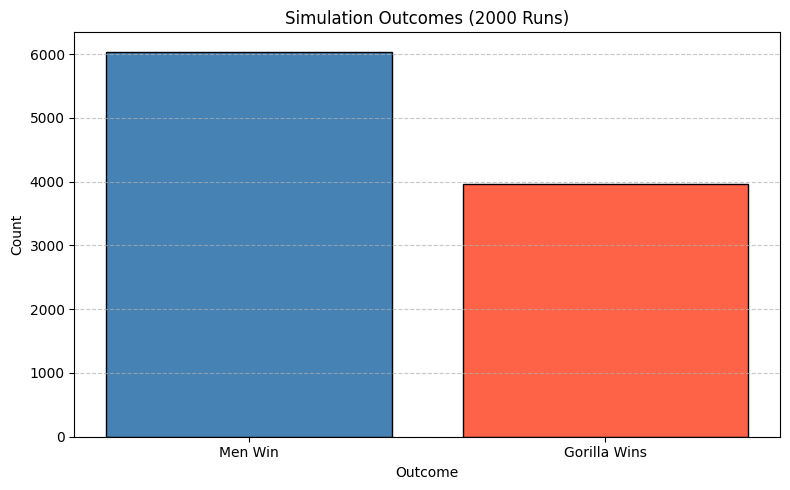

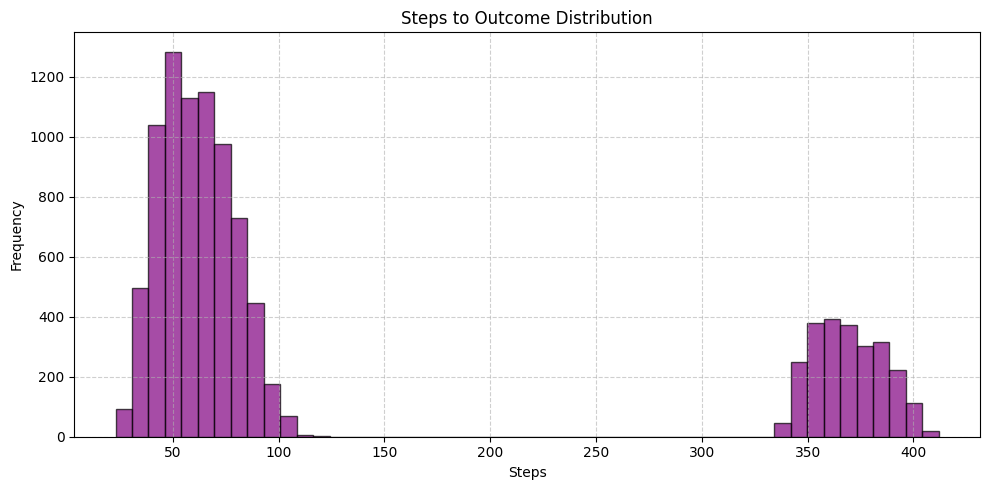

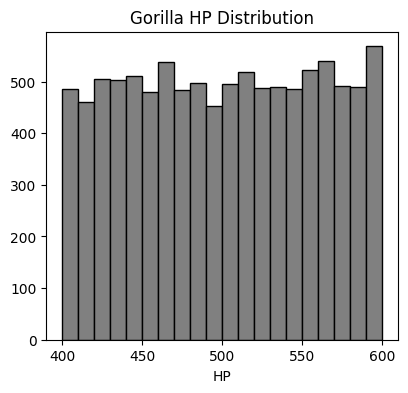

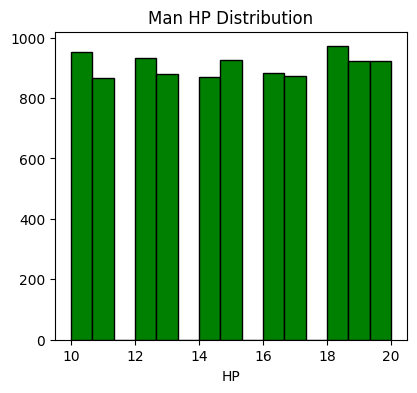

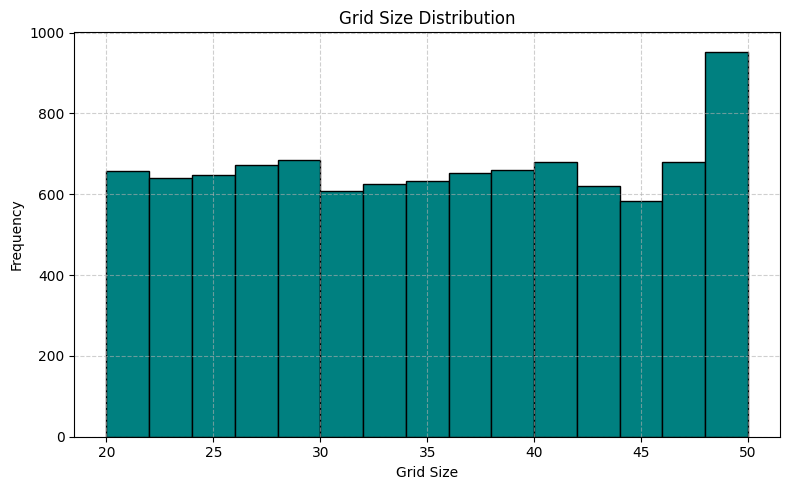

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import Counter

# --- Simulation Constants ---
NUM_SIMULATIONS = 10000
GRID_MIN, GRID_MAX = 20, 50
MAX_STEPS = 5000
NUM_MEN = 100

GORILLA_DAMAGE = 40
GORILLA_SPEED = 10
GORILLA_ACCURACY = 0.9
MAN_DAMAGE_RANGE = (5, 10)
MAN_SPEED = 1
MAN_ACCURACY = 0.6

# --- Movement Helper ---
def move_position(src, target, speed, grid_size):
    sx, sy = src
    tx, ty = target
    steps = min(speed, abs(tx - sx) + abs(ty - sy))
    for _ in range(steps):
        dx = 1 if tx > sx else -1 if tx < sx else 0
        dy = 1 if ty > sy else -1 if ty < sy else 0
        if dx != 0:
            sx += dx
        elif dy != 0:
            sy += dy
        sx = min(max(0, sx), grid_size - 1)
        sy = min(max(0, sy), grid_size - 1)
        if (sx, sy) == target:
            break
    return sx, sy

# --- Simulation Setup ---
def initialize_simulation(grid_size, man_hp, gorilla_hp):
    gorilla = {'hp': gorilla_hp, 'pos': (grid_size // 2, grid_size // 2)}
    men = []
    occupied = {gorilla['pos']}
    while len(men) < NUM_MEN:
        x = random.randint(grid_size // 2 - random.randint(0, grid_size // 2), grid_size // 2 + random.randint(0, grid_size // 2))
        y = random.randint(grid_size // 2 - random.randint(0, grid_size // 2), grid_size // 2 + random.randint(0, grid_size // 2))
        pos = (min(max(0, x), grid_size - 1), min(max(0, y), grid_size - 1))
        if pos not in occupied:
            men.append({'hp': man_hp, 'pos': pos, 'alive': True})
            occupied.add(pos)
    return gorilla, men

# --- Full Logging Simulation ---
def run_simulation_with_logging():
    grid_size = random.randint(GRID_MIN, GRID_MAX)
    man_hp = random.randint(10, 20)
    gorilla_hp = random.randint(400, 600)
    gorilla, men = initialize_simulation(grid_size, man_hp, gorilla_hp)
    last_kill_step = 0
    step = 0

    for step in range(MAX_STEPS):
        alive_men = [m for m in men if m['alive']]

        if len(alive_men) <= 3:
            outcome = "Gorilla Wins"
            break
        if step - last_kill_step > 300:
            outcome = "Gorilla Wins"
            break
        if not alive_men:
            outcome = "Gorilla Wins"
            break
        if gorilla['hp'] <= 0:
            outcome = "Men Win"
            break

        gx, gy = gorilla['pos']
        nearest = min(alive_men, key=lambda m: abs(m['pos'][0] - gx) + abs(m['pos'][1] - gy))
        new_pos = move_position(gorilla['pos'], nearest['pos'], GORILLA_SPEED, grid_size)

        if new_pos == gorilla['pos']:
            directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
            random.shuffle(directions)
            for dx, dy in directions:
                jx = gx + dx * GORILLA_SPEED
                jy = gy + dy * GORILLA_SPEED
                if 0 <= jx < grid_size and 0 <= jy < grid_size:
                    if all(m['pos'] != (jx, jy) for m in alive_men):
                        gorilla['pos'] = (jx, jy)
                        break
        else:
            gorilla['pos'] = new_pos

        gx, gy = gorilla['pos']
        adjacent_targets = [m for m in alive_men if abs(gx - m['pos'][0]) + abs(gy - m['pos'][1]) == 1]
        for m in adjacent_targets:
            if random.random() < GORILLA_ACCURACY:
                m['hp'] -= GORILLA_DAMAGE
                if m['hp'] <= 0:
                    m['alive'] = False
                    last_kill_step = step

        for m in men:
            if not m['alive']:
                continue
            m['pos'] = move_position(m['pos'], gorilla['pos'], MAN_SPEED, grid_size)
            mx, my = m['pos']
            if abs(mx - gx) + abs(my - gy) == 1 and random.random() < MAN_ACCURACY:
                dmg = random.randint(*MAN_DAMAGE_RANGE)
                gorilla['hp'] -= dmg

    else:
        outcome = "Gorilla Wins"  # Treat timeout as Gorilla win

    return {
        "GridSize": grid_size,
        "GorillaHP": gorilla_hp,
        "GorillaDamage": GORILLA_DAMAGE,
        "GorillaAccuracy": GORILLA_ACCURACY,
        "GorillaSpeed": GORILLA_SPEED,
        "ManHP": man_hp,
        "ManSpeed": MAN_SPEED,
        "ManAccuracy": MAN_ACCURACY,
        "ManMinDamage": MAN_DAMAGE_RANGE[0],
        "ManMaxDamage": MAN_DAMAGE_RANGE[1],
        "Steps": step,
        "Outcome": outcome
    }

# --- Run All Simulations ---
logs = [run_simulation_with_logging() for _ in range(NUM_SIMULATIONS)]
df_sim = pd.DataFrame(logs)

# --- PLOTS ---

# 1. Outcome Bar Chart
outcome_counts = df_sim["Outcome"].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(outcome_counts.index, outcome_counts.values, color=['steelblue', 'tomato'], edgecolor='black')
plt.title("Simulation Outcomes (2000 Runs)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Steps to Reach Outcome (Histogram)
plt.figure(figsize=(10, 5))
plt.hist(df_sim["Steps"], bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title("Steps to Outcome Distribution")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Gorilla HP & Damage Distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df_sim["GorillaHP"], bins=20, color='gray', edgecolor='black')
plt.title("Gorilla HP Distribution")
plt.xlabel("HP")

# 4. Man HP & Damage Distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df_sim["ManHP"], bins=15, color='green', edgecolor='black')
plt.title("Man HP Distribution")
plt.xlabel("HP")

# 5. Grid Size Distribution
plt.figure(figsize=(8, 5))
plt.hist(df_sim["GridSize"], bins=15, color='teal', edgecolor='black')
plt.title("Grid Size Distribution")
plt.xlabel("Grid Size")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

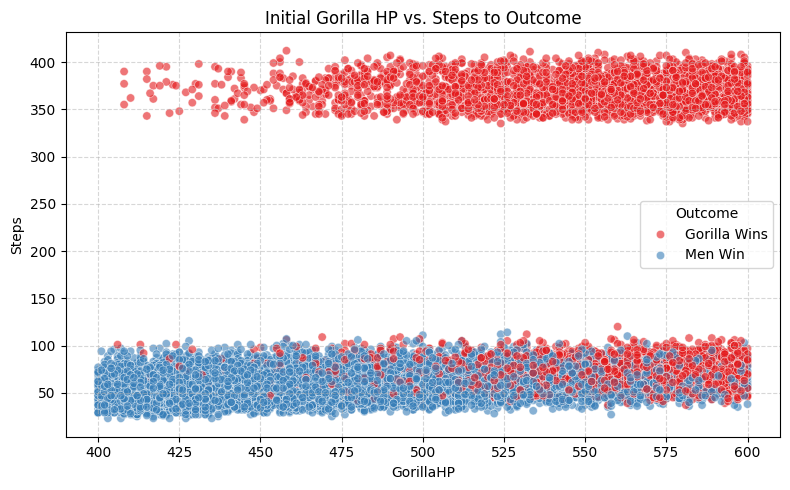

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_sim, x="GorillaHP", y="Steps", hue="Outcome", palette="Set1", alpha=0.6)
plt.title("Initial Gorilla HP vs. Steps to Outcome")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<ipython-input-5-dc79040197bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="GorillaHP", data=df_sim, palette="Set2")


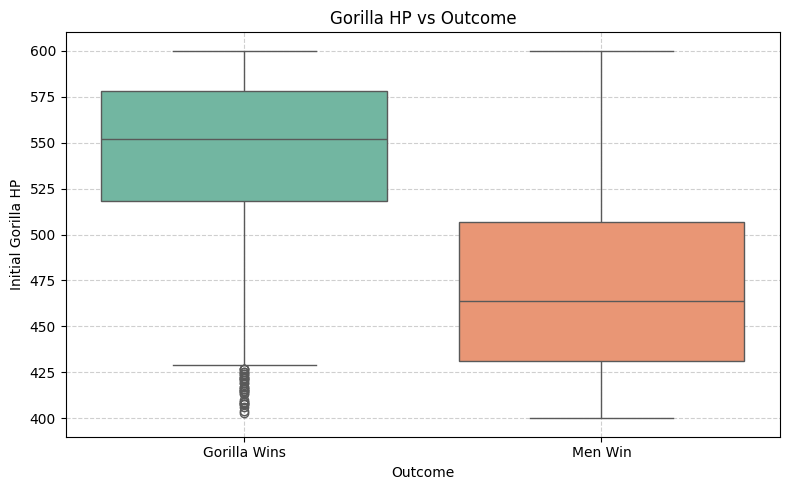

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x="Outcome", y="GorillaHP", data=df_sim, palette="Set2")
plt.title("Gorilla HP vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("Initial Gorilla HP")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-6-009d519b7d79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="GridSize", data=df_sim, palette="Set3")


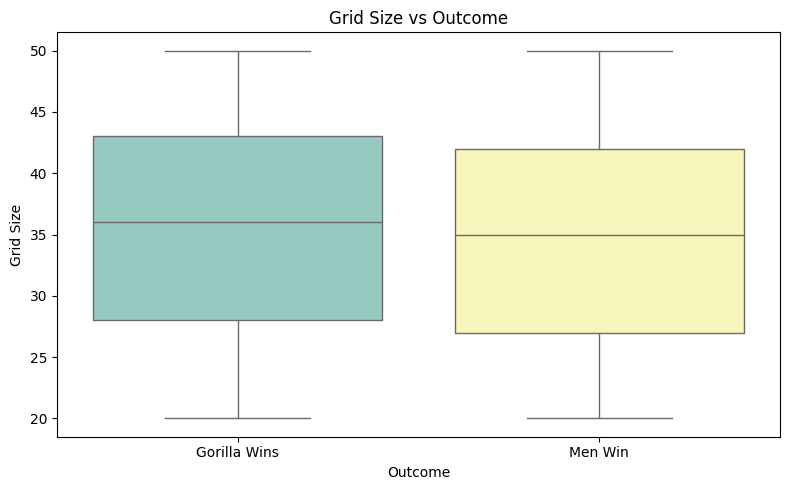

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Outcome", y="GridSize", data=df_sim, palette="Set3")
plt.title("Grid Size vs Outcome")
plt.ylabel("Grid Size")
plt.tight_layout()
plt.show()

<ipython-input-7-57afbe654af9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grid_outcome_dist = df_sim.groupby(["GridBin", "Outcome"]).size().unstack().fillna(0)


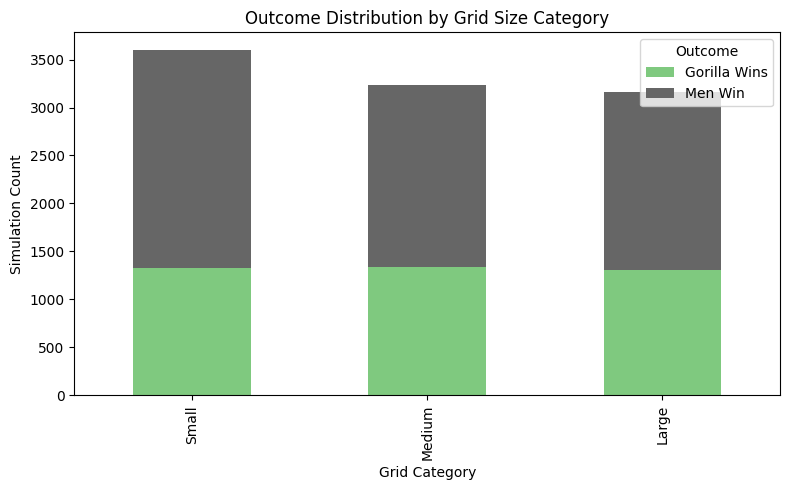

In [ ]:
df_sim["GridBin"] = pd.cut(df_sim["GridSize"], bins=[19, 30, 40, 50], labels=["Small", "Medium", "Large"])
grid_outcome_dist = df_sim.groupby(["GridBin", "Outcome"]).size().unstack().fillna(0)
grid_outcome_dist.plot(kind='bar', stacked=True, colormap='Accent', figsize=(8, 5))
plt.title("Outcome Distribution by Grid Size Category")
plt.ylabel("Simulation Count")
plt.xlabel("Grid Category")
plt.tight_layout()
plt.show()

<ipython-input-8-73c328b03fb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Steps", data=df_sim, palette="coolwarm")


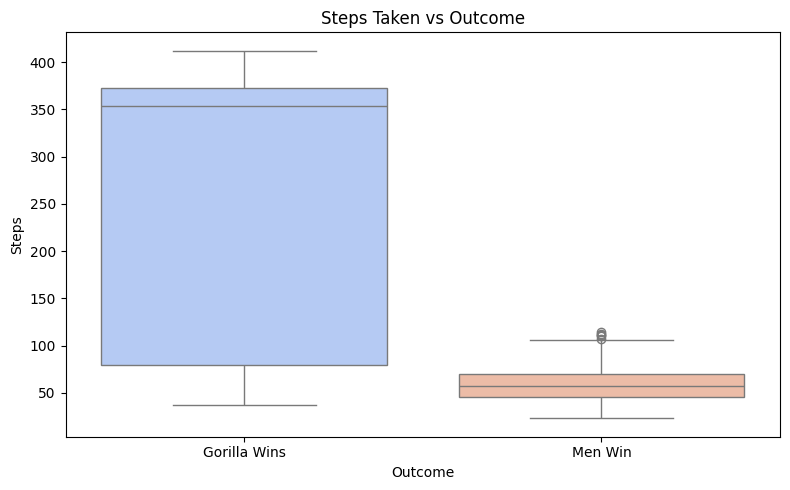

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Outcome", y="Steps", data=df_sim, palette="coolwarm")
plt.title("Steps Taken vs Outcome")
plt.ylabel("Steps")
plt.tight_layout()
plt.show()

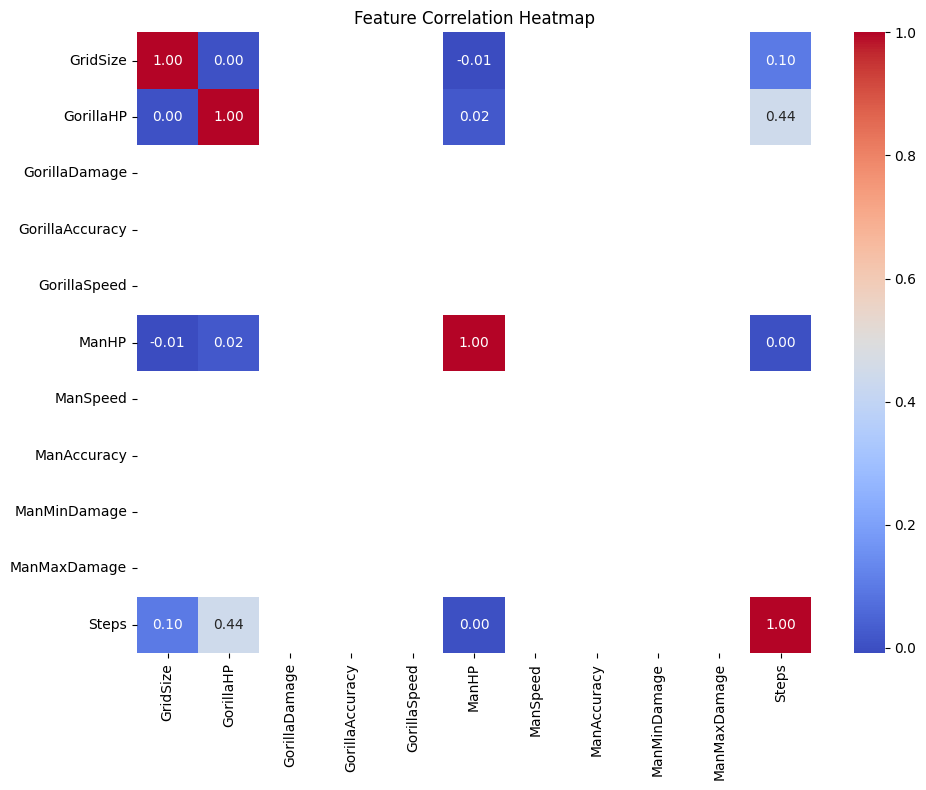

In [ ]:
plt.figure(figsize=(10, 8))

# Keep only numeric columns
numeric_df = df_sim.select_dtypes(include=['number'])

# Compute correlation and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()